In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/sample_submission.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv
/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv


In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv("/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/train_dataset.csv")
test = pd.read_csv("/kaggle/input/Predict-the-Customer-Satisfaction-CSE-22/test_dataset.csv")

In [4]:
train['age'] = train['age'].astype('Int8')
train['loyalty_points_redeemed'] = train['loyalty_points_redeemed'].astype('Int8')
train['loyalty_tier'] = train['loyalty_tier'].astype('Float32')
train['Received_card_discount_percentage'] = train['Received_card_discount_percentage'].astype('Float32')
train['Received_coupon_discount_percentage'] = train['Received_coupon_discount_percentage'].astype('Float32')

In [5]:
test['age'] = test['age'].astype('Int8')
test['loyalty_points_redeemed'] = test['loyalty_points_redeemed'].astype('Int8')
test['loyalty_tier'] = test['loyalty_tier'].astype('Float32')
test['Received_card_discount_percentage'] = test['Received_card_discount_percentage'].astype('Float32')
test['Received_coupon_discount_percentage'] = test['Received_coupon_discount_percentage'].astype('Float32')

In [6]:
test['estimated_delivery_date'] = pd.to_datetime(test['estimated_delivery_date'])
test['received_date'] = pd.to_datetime(test['received_date'])
test['released_date'] = pd.to_datetime(test['released_date'])
test['purchased_datetime'] = pd.to_datetime(test['purchased_datetime'])
test['payment_datetime'] = pd.to_datetime(test['payment_datetime'])

In [7]:
train['estimated_delivery_date'] = pd.to_datetime(train['estimated_delivery_date'])
train['received_date'] = pd.to_datetime(train['received_date'])
train['released_date'] = pd.to_datetime(train['released_date'])
train['purchased_datetime'] = pd.to_datetime(train['purchased_datetime'])
train['payment_datetime'] = pd.to_datetime(train['payment_datetime'])

In [8]:
#fill missing values with 0

In [9]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [10]:
import matplotlib.pyplot as plt

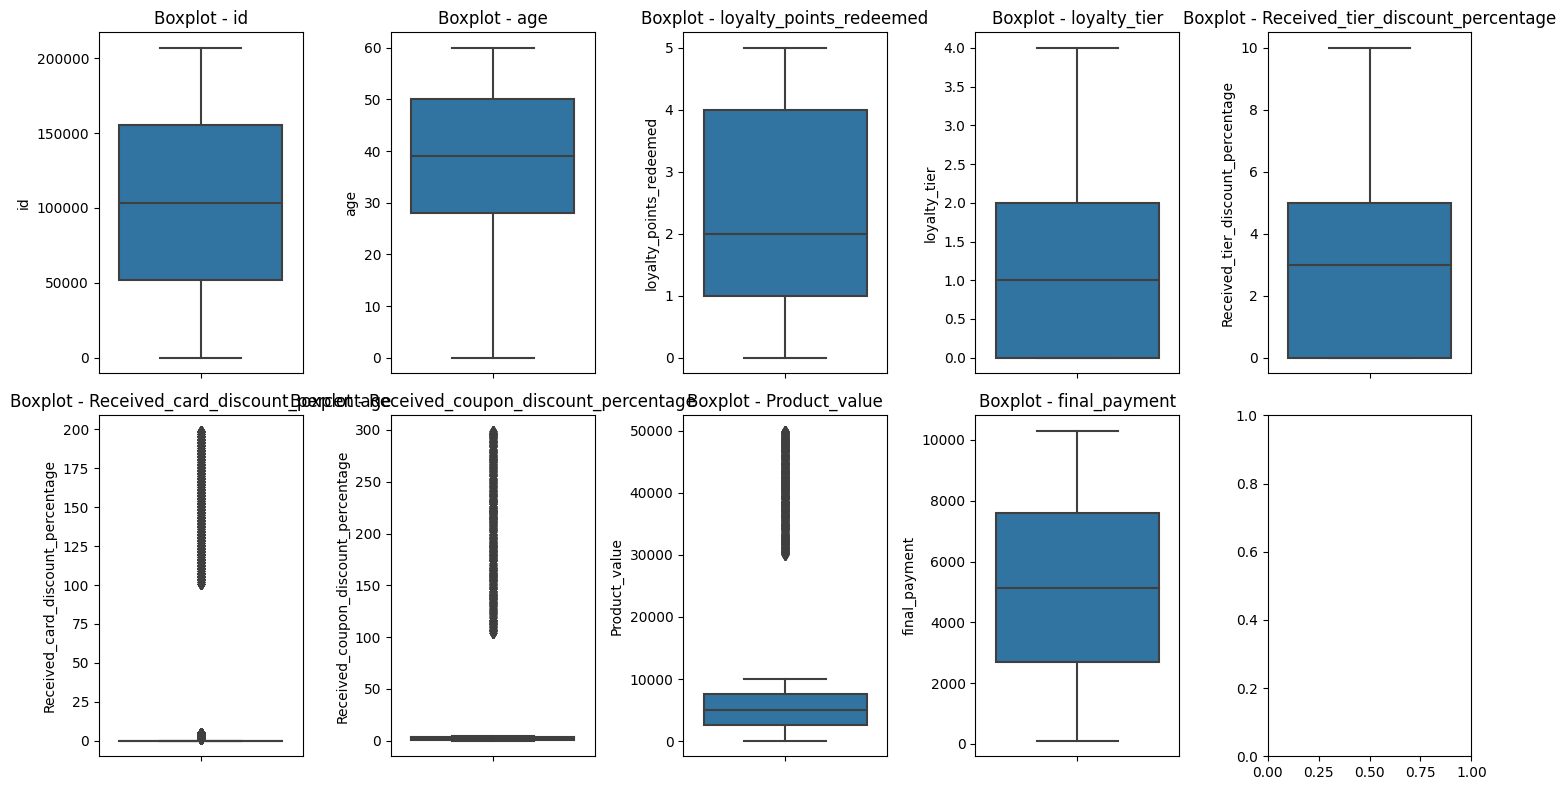

In [11]:
all_numeric_cols = train.select_dtypes(include=['number']).columns
columns_to_plot = all_numeric_cols

no_of_columns = 5 #how many rows in the graph
no_of_rows = int(np.ceil(len(columns_to_plot)/no_of_columns))

fig, axes = plt.subplots(nrows=no_of_rows, ncols=no_of_columns, figsize=(15, 4 * no_of_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=train[column], ax=axes[i])
    axes[i].set_title(f"Boxplot - {column}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

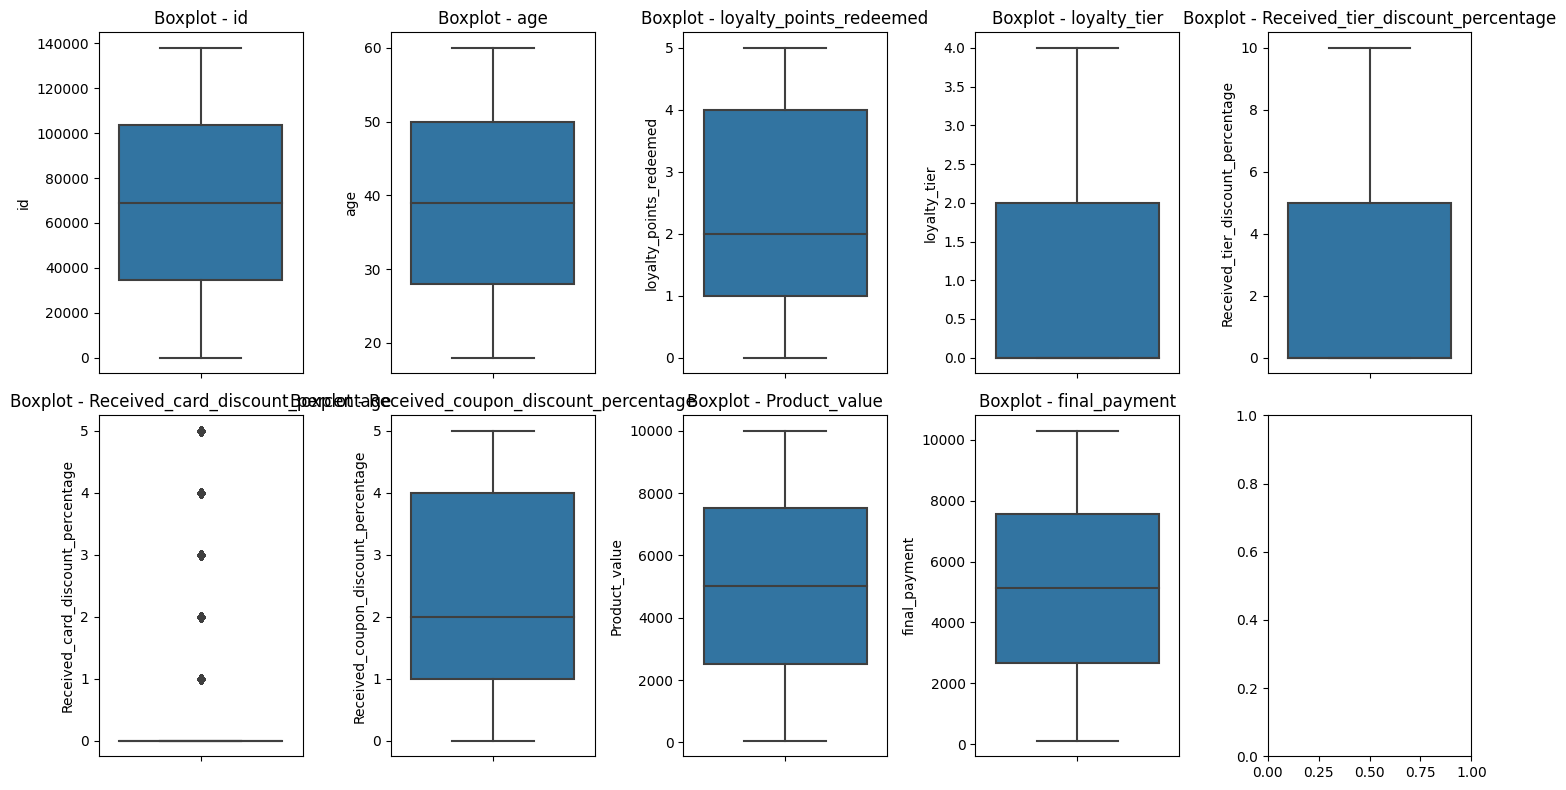

In [12]:
all_numeric_cols = test.select_dtypes(include=['number']).columns
columns_to_plot = all_numeric_cols

no_of_columns = 5 #how many rows in the graph
no_of_rows = int(np.ceil(len(columns_to_plot)/no_of_columns))

fig, axes = plt.subplots(nrows=no_of_rows, ncols=no_of_columns, figsize=(15, 4 * no_of_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=test[column], ax=axes[i])
    axes[i].set_title(f"Boxplot - {column}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

In [13]:
# Define a function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

numeric_columns = [ "Product_value","Received_coupon_discount_percentage"]  

train = remove_outliers_iqr(train, numeric_columns)


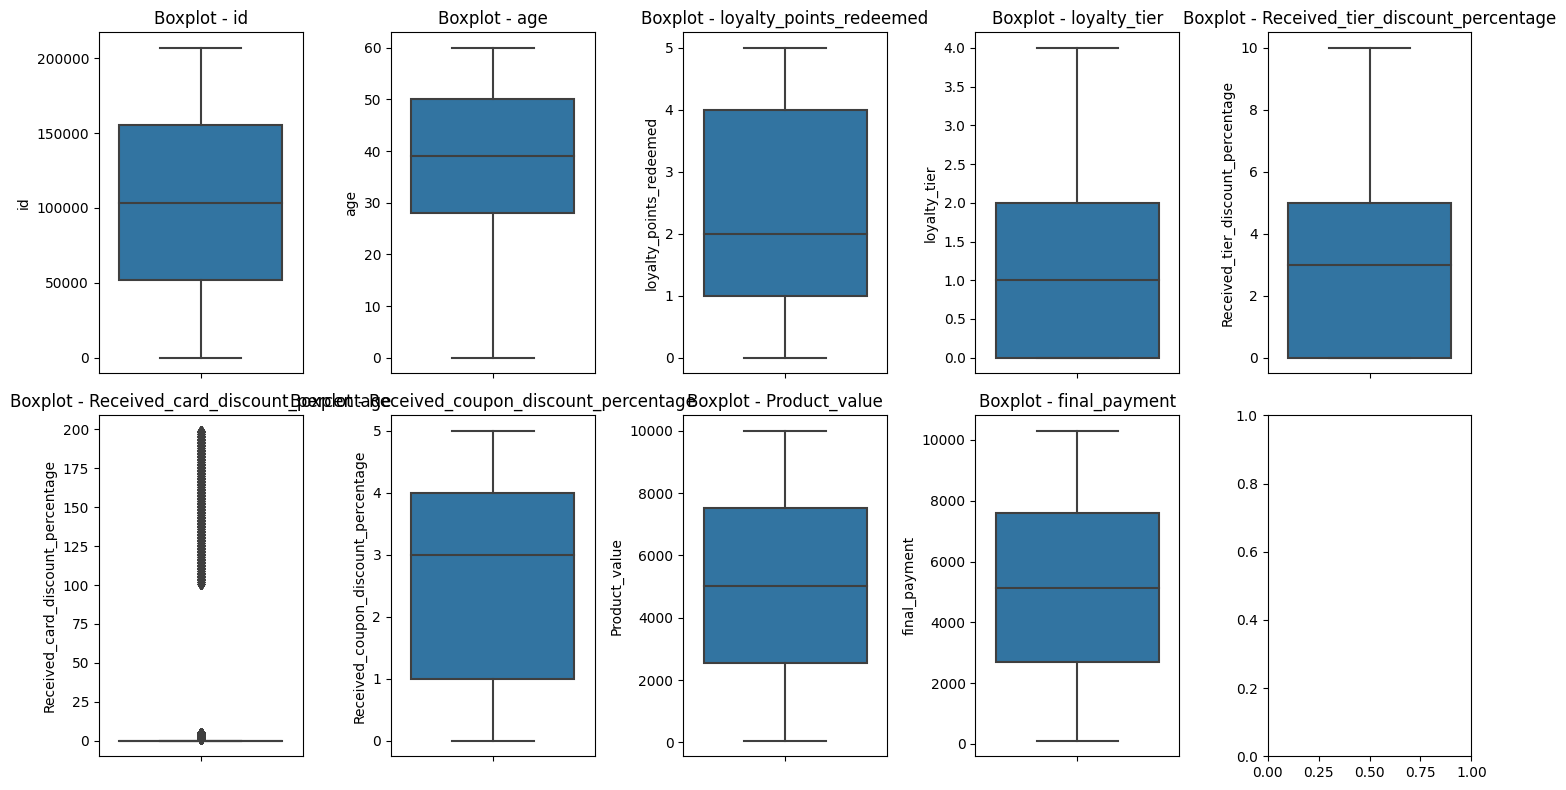

In [14]:
all_numeric_cols = train.select_dtypes(include=['number']).columns
columns_to_plot = all_numeric_cols

no_of_columns = 5 #how many rows in the graph
no_of_rows = int(np.ceil(len(columns_to_plot)/no_of_columns))

fig, axes = plt.subplots(nrows=no_of_rows, ncols=no_of_columns, figsize=(15, 4 * no_of_rows))
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.boxplot(y=train[column], ax=axes[i])
    axes[i].set_title(f"Boxplot - {column}")
    axes[i].grid(False)

plt.tight_layout()
plt.show()

In [15]:
train['customer_experience'] = train['customer_experience'].replace('bad',0)
train['customer_experience'] = train['customer_experience'].replace('neutral',1)
train['customer_experience'] = train['customer_experience'].replace('good',2)

<ipython-input-15-a19c12a3c14b>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['customer_experience'] = train['customer_experience'].replace('good',2)


In [16]:
new_df = pd.concat([train, test], axis =0, ignore_index=True)

In [17]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode_and_add(df, column):
    one_hot_encoder = OneHotEncoder(sparse_output = False)
    one_hot_encoded_array = one_hot_encoder.fit_transform(df[[column]])
    encoded_columns = pd.DataFrame(one_hot_encoded_array, columns=one_hot_encoder.get_feature_names_out([column]))
    encoded_columns.index = df.index
    df = pd.concat([df, encoded_columns], axis=1)
    df = df.drop(columns=[column])
    return df

In [18]:
columns_to_encode = ['Gender', 'Is_current_loyalty_program_member', 'purchase_medium', 'shipping_method']

for col in columns_to_encode:
    new_df = one_hot_encode_and_add(new_df, col)

In [19]:
test.shape

(137971, 25)

In [20]:
train.shape

(205267, 26)

In [21]:
train = new_df[new_df.index < 205267]
test = new_df[new_df.index >= 205267]
test = test.drop(columns=['customer_experience'])

In [22]:
columns_to_drop = ['user_id', 'transaction_id','order_id','tracking_number']
train = train.drop(columns=columns_to_drop)
test = test.drop(columns=columns_to_drop)

In [23]:
train['Date_Registered'] = pd.to_datetime(train['Date_Registered'])
test['Date_Registered'] = pd.to_datetime(test['Date_Registered'])

In [24]:
new_second_df = pd.concat([train, test], axis =0, ignore_index=True)

In [25]:
new_second_df['payment_method'].unique()

array(['visa_c', 'amex', 'mastercard_c', 'coinsph', 'visa_d', 'gcash',
       'maya', 'cash', 'bank_transfer', 'shopeepay', 'otc', 'grabpay',
       'mastercard_d'], dtype=object)

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
encoder = LabelEncoder()
new_second_df['payment_method_encoded'] = encoder.fit_transform(new_second_df['payment_method'])

In [28]:
new_second_df.drop(columns=['payment_method'])

,id,age,Date_Registered,loyalty_points_redeemed,loyalty_tier,Received_tier_discount_percentage,Received_card_discount_percentage,Received_coupon_discount_percentage,product_category,Product_value,...,Gender_F,Gender_M,Gender_O,Is_current_loyalty_program_member_NO,Is_current_loyalty_program_member_YES,purchase_medium_in-store,purchase_medium_online,shipping_method_express,shipping_method_standard,payment_method_encoded
0,0,44,2020-01-01,5,0.0,0.0,3.0,3.0,office supplies,1003,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,11
1,1,36,2020-01-04,4,1.0,3.0,4.0,1.0,electronics,4707,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0
2,2,40,2020-01-02,3,0.0,0.0,3.0,5.0,pet supplies,5486,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,6
3,3,33,2020-01-06,1,1.0,3.0,2.0,3.0,clothing,2121,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,11
4,4,43,2020-01-06,1,1.0,3.0,4.0,2.0,books,246,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343233,137966,57,2024-12-24,3,1.0,3.0,0.0,4.0,toys,2574,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,9
343234,137967,34,2024-12-20,1,4.0,10.0,0.0,0.0,pet supplies,165,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,9
343235,137968,42,2023-07-15,0,1.0,3.0,0.0,5.0,automotive,2128,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3
343236,137969,51,2024-12-12,2,0.0,0.0,5.0,2.0,beauty,2195,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0


In [29]:
encoder = LabelEncoder()
new_second_df['product_category_encoded'] = encoder.fit_transform(new_second_df['product_category'])

In [30]:
new_second_df.drop(columns=['product_category', 'payment_method'], inplace=True)


In [31]:
new_second_df['loyalty_duration'] = (new_second_df['received_date'] - new_second_df['Date_Registered']).dt.days

In [32]:
new_second_df['order_frequency'] = new_second_df.apply(
    lambda row: 0 if row['loyalty_duration'] == 0 else 1 / (row['loyalty_duration'] + 1),
    axis=1
)

In [33]:
new_second_df['loyalty_points_per_day'] = new_second_df.apply(
    lambda row: 0 if row['loyalty_points_redeemed'] == 0 else row['loyalty_points_redeemed'] / (row['loyalty_duration'] + 1),
    axis=1
)


In [34]:
new_second_df['avg_order_value'] = new_second_df['final_payment'] / new_second_df['Product_value']


In [35]:
new_second_df['delivery_time_days'] = (new_second_df['estimated_delivery_date'] - new_second_df['released_date']).dt.days

In [36]:
new_second_df['total_discount_percentage'] = (new_second_df['Received_tier_discount_percentage'] +
                                    new_second_df['Received_card_discount_percentage'] +
                                    new_second_df['Received_coupon_discount_percentage'])


In [37]:
new_second_df['discount_ratio'] = new_second_df['total_discount_percentage'] / new_second_df['Product_value']

In [38]:
new_second_df['purchase_year'] = new_second_df['purchased_datetime'].dt.year
new_second_df['purchase_month'] = new_second_df['purchased_datetime'].dt.month
new_second_df['purchase_day_of_week'] = new_second_df['purchased_datetime'].dt.dayofweek

In [39]:
new_second_df['Date_Registered_year'] = new_second_df['Date_Registered'].dt.year
new_second_df['Date_Registered_month'] = new_second_df['Date_Registered'].dt.month
new_second_df['Date_Registered_day_of_week'] = new_second_df['Date_Registered'].dt.dayofweek

new_second_df['payment_datetime_year'] = new_second_df['payment_datetime'].dt.year
new_second_df['payment_datetime_month'] = new_second_df['payment_datetime'].dt.month
new_second_df['payment_datetime_day_of_week'] = new_second_df['payment_datetime'].dt.dayofweek

new_second_df['released_year'] = new_second_df['released_date'].dt.year
new_second_df['released_month'] = new_second_df['released_date'].dt.month
new_second_df['released_day_of_week'] = new_second_df['released_date'].dt.dayofweek

new_second_df['estimated_delivery_year'] = new_second_df['estimated_delivery_date'].dt.year
new_second_df['estimated_delivery_month'] = new_second_df['estimated_delivery_date'].dt.month
new_second_df['estimated_delivery_day_of_week'] = new_second_df['estimated_delivery_date'].dt.dayofweek

new_second_df['received_year'] = new_second_df['received_date'].dt.year
new_second_df['received_month'] = new_second_df['received_date'].dt.month
new_second_df['received_day_of_week'] = new_second_df['received_date'].dt.dayofweek

In [40]:
new_second_df.drop(columns=['Date_Registered', 'payment_datetime', 'purchased_datetime', 'released_date', 'estimated_delivery_date', 'received_date'], inplace=True)

In [41]:
new_second_df.drop(columns=['Gender_F', 'Gender_M', 'Gender_O'], inplace=True)

In [42]:
new_second_df.dtypes

id                                         int64
age                                         Int8
loyalty_points_redeemed                     Int8
loyalty_tier                             Float32
Received_tier_discount_percentage        float64
Received_card_discount_percentage        Float32
Received_coupon_discount_percentage      Float32
Product_value                              int64
final_payment                            float64
customer_experience                      float64
Is_current_loyalty_program_member_NO     float64
Is_current_loyalty_program_member_YES    float64
purchase_medium_in-store                 float64
purchase_medium_online                   float64
shipping_method_express                  float64
shipping_method_standard                 float64
payment_method_encoded                     int64
product_category_encoded                   int64
loyalty_duration                           int64
order_frequency                          float64
loyalty_points_per_d

In [43]:
train = new_second_df[new_df.index < 205267]
test = new_second_df[new_df.index >= 205267]
test = test.drop(columns=['customer_experience'])

In [44]:
train.dtypes

id                                         int64
age                                         Int8
loyalty_points_redeemed                     Int8
loyalty_tier                             Float32
Received_tier_discount_percentage        float64
Received_card_discount_percentage        Float32
Received_coupon_discount_percentage      Float32
Product_value                              int64
final_payment                            float64
customer_experience                      float64
Is_current_loyalty_program_member_NO     float64
Is_current_loyalty_program_member_YES    float64
purchase_medium_in-store                 float64
purchase_medium_online                   float64
shipping_method_express                  float64
shipping_method_standard                 float64
payment_method_encoded                     int64
product_category_encoded                   int64
loyalty_duration                           int64
order_frequency                          float64
loyalty_points_per_d

received_day_of_week                     0.065868
loyalty_duration                         0.046071
order_frequency                          0.039773
loyalty_points_per_day                   0.025516
avg_order_value                          0.021873
delivery_time_days                       0.017877
Date_Registered_year                     0.012089
received_year                            0.010955
Received_card_discount_percentage        0.010898
released_year                            0.010871
estimated_delivery_year                  0.010788
total_discount_percentage                0.010786
purchase_year                            0.010250
payment_datetime_year                    0.010250
age                                      0.006664
Date_Registered_day_of_week              0.004910
released_day_of_week                     0.004633
estimated_delivery_day_of_week           0.003397
product_category_encoded                 0.003138
Date_Registered_month                    0.003088


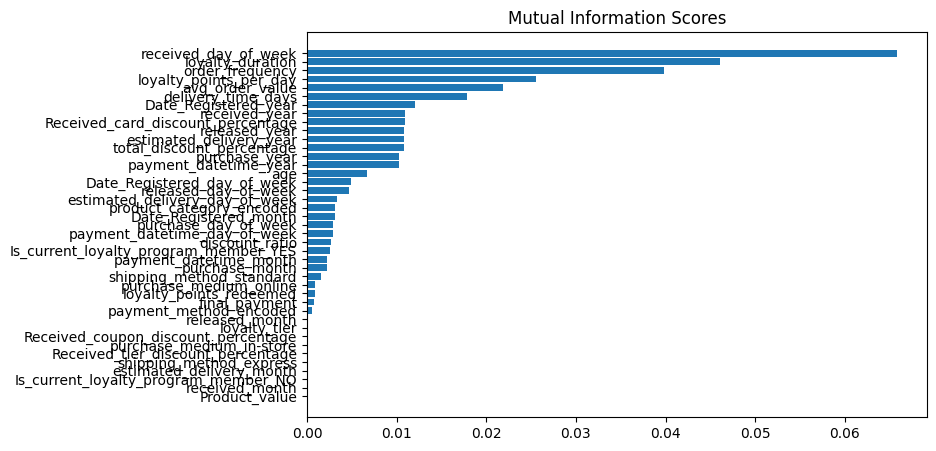

In [45]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    X = X.copy()
    X = X.dropna()  
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
X = train.drop(columns=['customer_experience','id'], axis=1)  
y = train['customer_experience']

mi_scores = make_mi_scores(X, y)

print(mi_scores)
# print(mi_scores.tail(20))  

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
# plot_mi_scores(mi_scores.tail(20))  

<h1>Model Training</h1>

In [46]:
from sklearn.model_selection import train_test_split

x = train.drop(columns=['customer_experience'], axis=1)
y = train['customer_experience']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42, stratify = y)

<h4>Robust scaler</h4>

In [47]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

<h4>Standard scaler</h4>

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

<h4>Define predict function</h4>

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def predict(x_train, y_train, x_test, y_test, model):

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    labels = ['Bad', 'Neutral','Good']
    
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

<h3>Logistic Regression</h3>

In [50]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=500, class_weight='balanced')
logistic_model.fit(x_train, y_train)

y_pred = logistic_model.predict(x_test)

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.49      0.47      0.48     13708
         1.0       0.38      0.50      0.43      9409
         2.0       0.65      0.57      0.61     17937

    accuracy                           0.52     41054
   macro avg       0.51      0.51      0.51     41054
weighted avg       0.54      0.52      0.52     41054



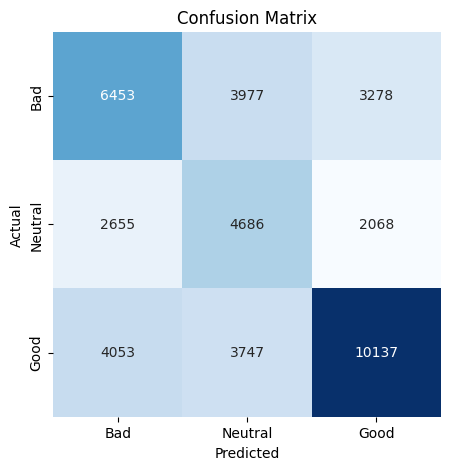

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Bad', 'Neutral','Good']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h3>Decision Tree Classifier</h3>


Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.61      0.56     13708
         1.0       0.50      0.46      0.48      9409
         2.0       0.70      0.63      0.66     17937

    accuracy                           0.58     41054
   macro avg       0.57      0.57      0.57     41054
weighted avg       0.59      0.58      0.58     41054



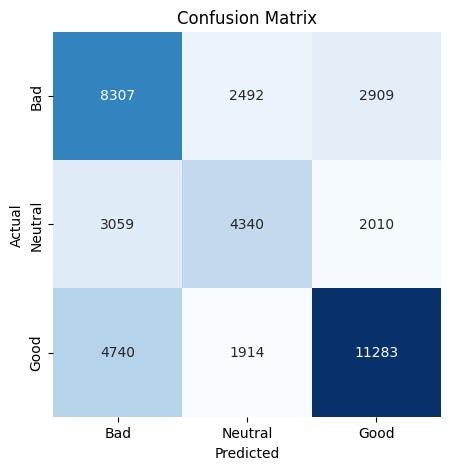

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion= 'gini', max_depth= 10, min_samples_leaf= 1, min_samples_split= 2)

predict(x_train, y_train, x_test, y_test, tree_model)

<h3>Random Forest Classifier</h3>


Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.62      0.56     13708
         1.0       0.56      0.39      0.46      9409
         2.0       0.67      0.67      0.67     17937

    accuracy                           0.59     41054
   macro avg       0.58      0.56      0.56     41054
weighted avg       0.59      0.59      0.59     41054



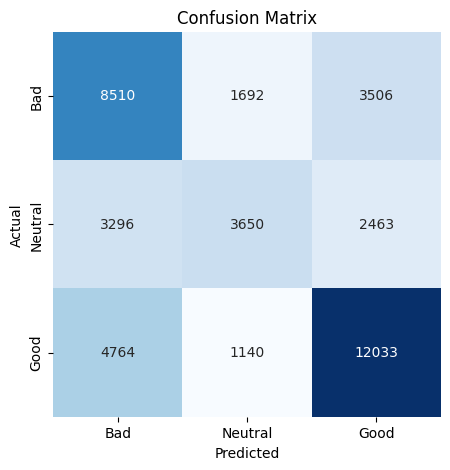

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=42)

predict(x_train, y_train, x_test, y_test, rf_model)


Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.62      0.56     13708
         1.0       0.58      0.40      0.47      9409
         2.0       0.67      0.68      0.67     17937

    accuracy                           0.59     41054
   macro avg       0.59      0.57      0.57     41054
weighted avg       0.60      0.59      0.59     41054



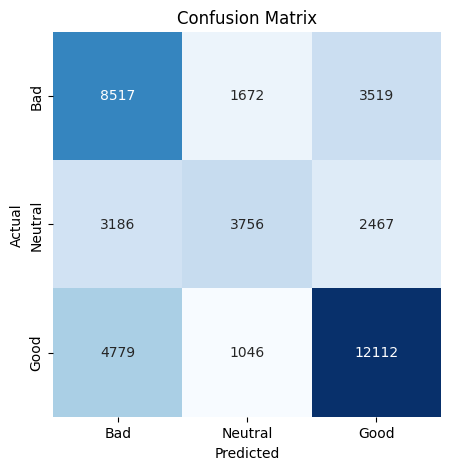

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

predict(x_train, y_train, x_test, y_test, rf_model)

<h3>Gradient Boosting Classifier</h3>

<h4>Using sample weights for unbalances samples</h4>


Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.53      0.54     13708
         1.0       0.48      0.64      0.55      9409
         2.0       0.72      0.61      0.66     17937

    accuracy                           0.59     41054
   macro avg       0.58      0.59      0.58     41054
weighted avg       0.61      0.59      0.59     41054



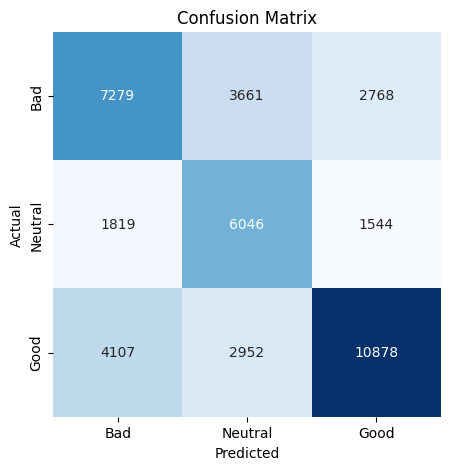

In [56]:
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.ensemble import GradientBoostingClassifier

# Compute class weights based on the training data
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

# Fit the model with sample weights
gb_model = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, random_state=42)
gb_model.fit(x_train, y_train, sample_weight=sample_weights)

y_pred = gb_model.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix

print("\nClassification Report:\n", classification_report(y_test, y_pred))

import seaborn as sns
import matplotlib.pyplot as plt

labels = ['Bad', 'Neutral','Good']

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h4>Using SMOTE for unbalanced sample</h4>


Classification Report:
               precision    recall  f1-score   support

         0.0       0.52      0.55      0.53     13708
         1.0       0.45      0.54      0.49      9409
         2.0       0.71      0.61      0.65     17937

    accuracy                           0.57     41054
   macro avg       0.56      0.56      0.56     41054
weighted avg       0.59      0.57      0.58     41054



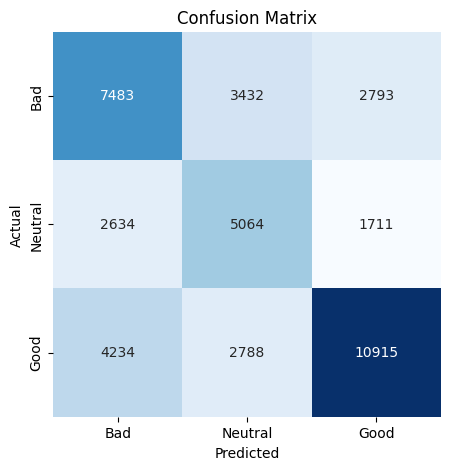

In [57]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

gb_model = GradientBoostingClassifier(n_estimators=70, learning_rate=0.05, random_state=42)

predict(x_train_resampled, y_train_resampled, x_test, y_test, gb_model)

<h4>Without concidering imbalance</h4>


Classification Report:
               precision    recall  f1-score   support

         0.0       0.51      0.64      0.57     13708
         1.0       0.54      0.42      0.47      9409
         2.0       0.69      0.65      0.67     17937

    accuracy                           0.59     41054
   macro avg       0.58      0.57      0.57     41054
weighted avg       0.60      0.59      0.59     41054



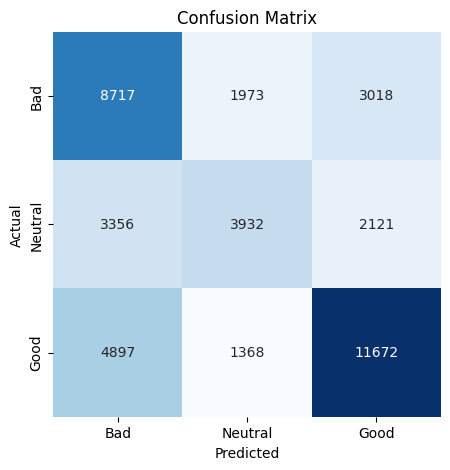

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, random_state=42)

predict(x_train, y_train, x_test, y_test, gb_model)

<h2>xgboost</h2>

Accuracy: 62.26%


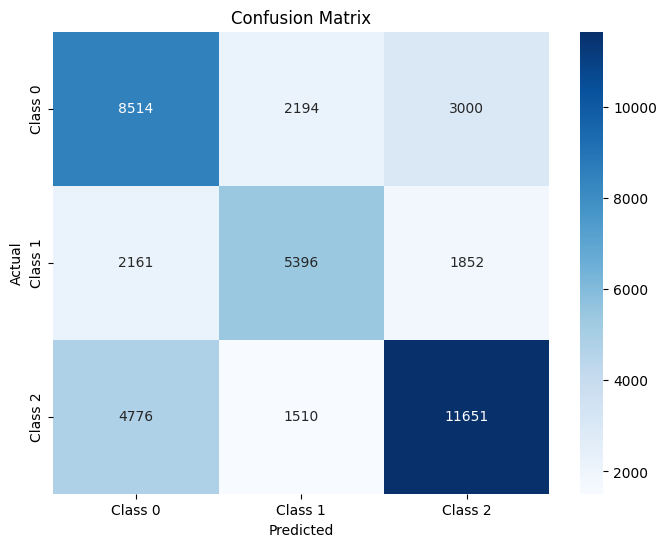

In [59]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an XGBoost DMatrix for faster computation
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters for multiclass classification
num_classes = len(y_train.unique())  # Number of unique classes in your target variable

params = {
    'objective': 'multi:softmax',  # For multiclass classification
    'eval_metric': 'merror',  # Multi-class classification error
    'num_class': 3,  # Number of classes
    'max_depth': 6,  # Maximum depth of the trees
    'learning_rate': 0.1,  # Step size at each iteration while moving toward a minimum
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:44:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 63.36%


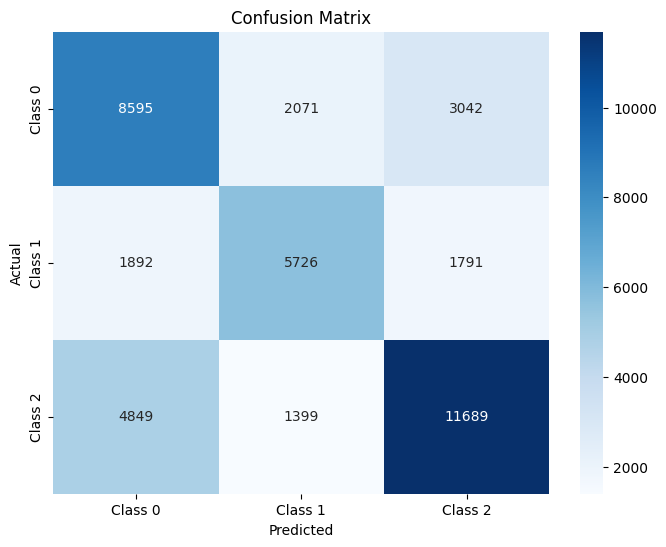

In [60]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create an XGBoost DMatrix for faster computation
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters for multiclass classification
num_classes = len(y_train.unique())  # Number of unique classes in your target variable

params = {
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': num_classes,
    #'eval_metric': 'merror',  # Multi-class classification error
    'max_depth': 10,
    'learning_rate': 0.05,
    'n_estimators': 150,
    'subsample': 1.0,
    'colsample_bytree': 0.8
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
preds = bst.predict(dtest)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate the confusion matrix
cm = confusion_matrix(y_test, preds)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h3>XGBClassifier</h3>

<h4>Using sample weights</h4>

Accuracy: 62.58%


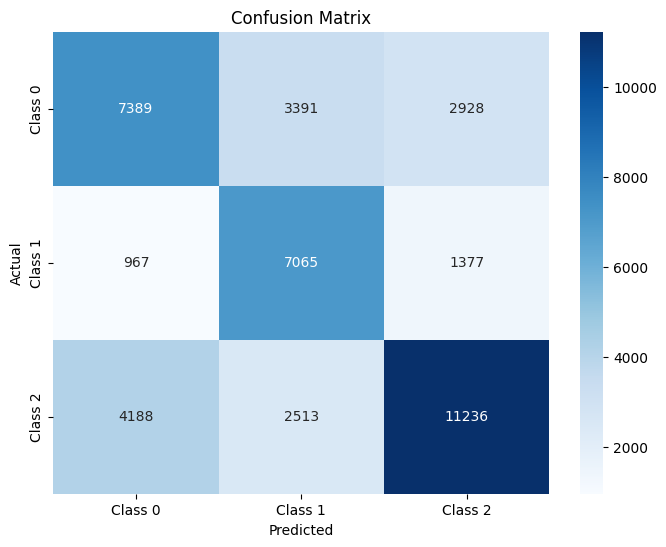

In [61]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Calculate class frequencies
class_counts = Counter(y_train)
total_samples = len(y_train)
num_classes = len(class_counts)

# Assign weights to each class, with higher weights for the minority class
weights = np.array([class_counts.get(label, 0) for label in y_train])
class_weights = {0: 1, 1: 2, 2: 1}  # Example weights; adjust based on your class distribution
sample_weights = np.array([class_weights[label] for label in y_train])

# Define the model
model = XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    max_depth=10,
    learning_rate=0.05,
    n_estimators=150,
    subsample=1.0,
    colsample_bytree=0.8
)

# Fit the model with sample weights
model.fit(x_train, y_train, sample_weight=sample_weights)

# Make predictions
preds = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


<h4>Without sample weights</h4>

Accuracy: 63.71%


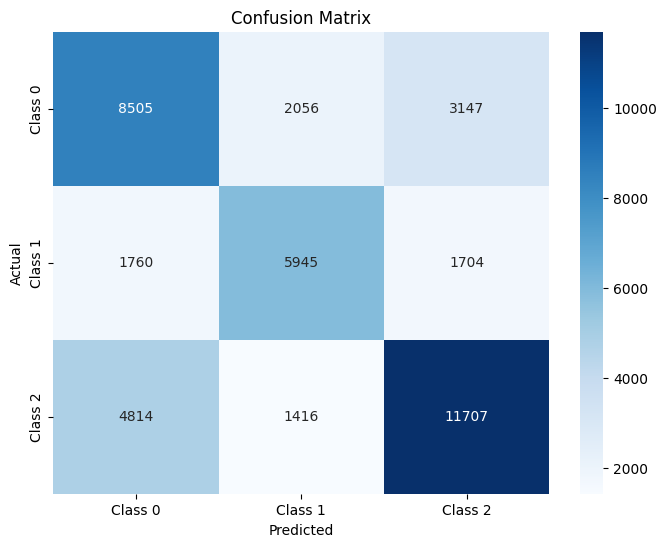

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from collections import Counter

# Define the model
model = XGBClassifier(
    objective='multi:softmax',
    num_class=3,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=100,
    subsample=1.0,
    colsample_bytree=0.8
)

# Fit the model
model.fit(x_train, y_train)

# Make predictions
preds = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 63.88%


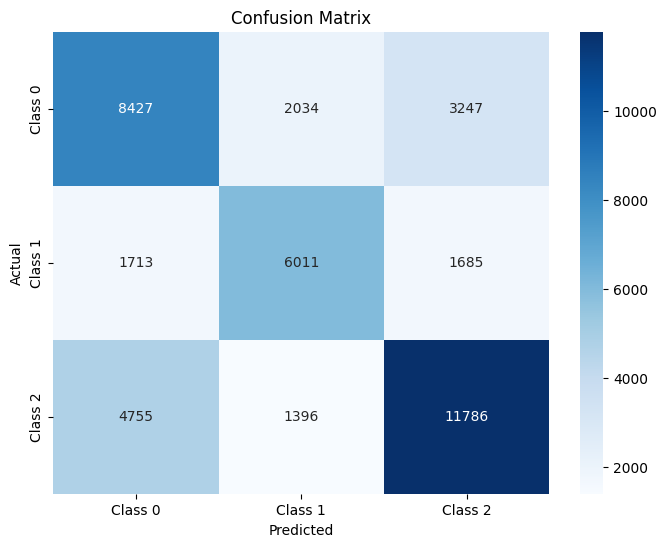

In [63]:
from xgboost import XGBClassifier

# Define the model
model = XGBClassifier(
    objective='multi:softmax',
    num_class=num_classes,
    max_depth=10,
    learning_rate=0.1,
    n_estimators=150,
    subsample=1.0,
    colsample_bytree=0.8
)

# Fit the model
model.fit(x_train, y_train)

# Make predictions
preds = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_classes)], yticklabels=[f'Class {i}' for i in range(num_classes)])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
